In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('./heart-attack-risk-analysis-dataset/train.csv')
test_df = pd.read_csv('./heart-attack-risk-analysis-dataset/test.csv')
# combine = [train_df, test_df]

In [ ]:
print(train_df.columns.values)

In [ ]:
train_df.head(10)

In [ ]:
train_df.tail(10)

In [ ]:
train_df.info()
print('_'*40)
test_df.info()

* Above 50% of the patients are over 53 y/0 - This also appears to be a Normal distribution - mean == median. Could also be any other kind of
    symmetrical distribution [Continuous]
* Cholesterol seems to be a Gaussian distribution. Median and Mean seem to revolve around 259 [Continuous]
* The same goes for hear rate [Continuous]
* 50% or more people have diabetes [Binary]
* Around 25% of the people have family history [Binary]
* Around 75% or more people smoke [Binary]
* Around 25% of the people are obese [Binary]
* 50% or more people consume alcohol [Binary]
* Exercise per week appears to be a symmetrical distribution (mean == median) with mean around 10 [Continuous]
* About 25% people have previous heart problems [Binary]
* 50% or more people use medicine [Binary]
* Stress Level - appears to be a symmetrical distribution [Continuous]
* Sedentary hours per day - appears to be symmetrical [Continuous]
* Income also appears to be a symmetrical distribution [Continuous]
* BMI appears to be a symmetrical distribution [Continuous]
* Trigylcerida also appears to be a symmetrical distribution [Continuous]
* Physical Activity days per week appears to be a symmetrical distribution [Continuous]
* Sleep hours per day also appears to be a symmetrical distribution [Continuous]
* Around 25% of the people have heart attack risk


* **Continuous to Categorical**: Age, Cholesterol, heart rate, exercise per week, stress level, sedentary hours, income, bmi, triglyceride, physical activities, sleep  hours per day

In [ ]:
train_df.describe()

* More males 
* Interesting a lot of people have the same blood pressures - there are only 3590 unique pressures. Maybe we could engineer a feature: the sum

In [ ]:
train_df.describe(include=['O'])

## **Visualizing Categorical Data**
* Looks like sex, Diet, Country, Hemisphere is not all that useful
* Continent might be slightly useful - Americas, Africa and Australia lead to higher heart attack risk
* It might be worth grouping countries - first world country (higher risk), third world countries (lower risk) etc.

In [ ]:
train_df[['Sex', 'Heart Attack Risk']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=False)

In [ ]:
train_df[['Diet', 'Heart Attack Risk']].groupby(['Diet'], as_index=False).mean().sort_values(by='Diet', ascending=False)

In [ ]:
train_df[['Country', 'Heart Attack Risk']].groupby(['Country'], as_index=False).mean().sort_values(by='Country', ascending=False)

In [ ]:
train_df[['Continent', 'Heart Attack Risk']].groupby(['Continent'], as_index=False).mean().sort_values(by='Continent', ascending=False)

In [ ]:
train_df[['Hemisphere', 'Heart Attack Risk']].groupby(['Hemisphere'], as_index=False).mean().sort_values(by='Hemisphere', ascending=False)

In [ ]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Age', bins=15)

## **Correlating Categorical features**

* Looks like there is a relationship between sex, continent (Especially for Asia & Female, North America & Female, Male & Europe) and their associated heart attack risk
* There is a strange relationship between diet and continent. Turns out Unhealthy diet leads lower risks compared to average & healthy diets in South America & Africa


* **For now, using diet, sex and continent**

In [ ]:
grid = sns.FacetGrid(train_df, row='Sex', height=2.5, aspect=3.0)
grid.map(sns.pointplot, 'Continent', 'Heart Attack Risk', 'Sex', palette='deep')
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(train_df, row='Diet', height=2.5, aspect=3.0)
grid.map(sns.pointplot, 'Continent', 'Heart Attack Risk', 'Diet', palette='deep')
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(train_df, row='Sex', height=2.5, aspect=3.0)
grid.map(sns.pointplot, 'Diet', 'Heart Attack Risk', 'Sex', palette='deep')
grid.add_legend()

## **Visualizing Continuous data**
* No relationship between age and risk 
* Seems to be a relationship between Cholesterol range and risk = 1
* Average diet but more exercise > less risk. Average diet but less exercise, more risk
* Don't see how stress level is useful
* Sedentary might be useful
* There seems to be a relationship between higher salary and higher risk. This might be a correlation through diet. [**Take a look later**]
* Seems to be a relationship between risk = 1, lower end of and the very high end of BMI
* Triglyceride seems to vary for risk = 1 ever so slightly
* No relation with physical activity days per week
* Sleep hours per day seems to influence (negative correlation) risk = 1

**For now taking Heart Rate, Cholesterol, exercise, sedentary, Income, BMI, Triglyceride, Sleep Hrs per day**

In [ ]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Age', bins=30)

In [ ]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Heart Rate', bins=12)

In [ ]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Cholesterol', bins=15)

In [ ]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Exercise Hours Per Week', bins=15)

In [ ]:
grid = sns.FacetGrid(train_df, col='Heart Attack Risk', row='Diet', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Exercise Hours Per Week', alpha=.5, bins=40)
grid.add_legend();

In [ ]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Stress Level', bins=8)

In [ ]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Sedentary Hours Per Day', bins=10)

In [ ]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Income', bins=10)

In [ ]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'BMI', bins=15)

In [ ]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Triglycerides', bins=5)

In [ ]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Physical Activity Days Per Week', bins=7)

In [ ]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Sleep Hours Per Day', bins=7)

## Correlating Binary Data
* Diabetes seems useful
* Family history seems irrelevant
* Smoking, Obesity, Alcohol consumption is inversely related (!!). **Might drop later or make one feature out of these**
* Previous heart problem seems useful
* Medication doesn't seem useful

**Using Diabetes, Smoking, Obesity, Alcohol, Previous Heart Problems**


In [ ]:
train_df[["Diabetes", "Heart Attack Risk"]].groupby(['Diabetes'], as_index=False).mean().sort_values(by='Diabetes', ascending=True)

In [ ]:
train_df[["Family History", "Heart Attack Risk"]].groupby(['Family History'], as_index=False).mean().sort_values(by='Family History', ascending=True)

In [ ]:
train_df[["Smoking", "Heart Attack Risk"]].groupby(['Smoking'], as_index=False).mean().sort_values(by='Smoking', ascending=True)

In [ ]:
train_df[["Obesity", "Heart Attack Risk"]].groupby(['Obesity'], as_index=False).mean().sort_values(by='Obesity', ascending=True)

In [ ]:
train_df[["Alcohol Consumption", "Heart Attack Risk"]].groupby(['Alcohol Consumption'], as_index=False).mean().sort_values(by='Alcohol Consumption', ascending=True)

In [ ]:
train_df[["Previous Heart Problems", "Heart Attack Risk"]].groupby(['Previous Heart Problems'], as_index=False).mean().sort_values(by='Previous Heart Problems', ascending=True)

In [ ]:
train_df[["Medication Use", "Heart Attack Risk"]].groupby(['Medication Use'], as_index=False).mean().sort_values(by='Medication Use', ascending=True)

## Data preprocessing

* Splitting up heart rate and take addition
* Clearly, the sum BP is correlated to Heart risk. The graph is left skewed when risk = 0 and right skewed when it's right skewed, so **using Sum BP**
* Converting diet, sex and continent - from categorical to numerical representation

In [3]:
#dropping all unrequired categorical columns
train_df = train_df.drop(['Patient ID', 'Country', 'Hemisphere'], axis=1)
test_df = test_df.drop(['Patient ID', 'Country', 'Hemisphere'], axis=1)

In [4]:
train_df['Sum BP'] = train_df['Blood Pressure'].apply(lambda x: sum(int(num) for num in x.split('/')))
train_df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Heart Attack Risk,Sum BP
0,33,Male,200,129/90,48,0,1,1,1,1,...,2,0.138443,184066,30.449815,63,6,7,South America,1,219
1,56,Female,262,159/105,46,1,0,1,0,0,...,8,0.369552,211755,34.973685,333,7,8,Africa,1,264
2,19,Female,140,161/109,54,0,1,0,0,1,...,3,8.646334,252203,30.554246,537,2,10,Asia,0,270
3,50,Female,163,120/62,53,0,1,1,1,1,...,7,1.107884,121954,35.390265,591,0,9,Europe,1,182
4,89,Female,144,153/110,92,1,0,1,0,1,...,1,1.337570,180121,39.575483,145,2,5,Europe,1,263


In [5]:
#calculate the Sum BP for test set as well and drop Blood Pressure from both
test_df['Sum BP'] = train_df['Blood Pressure'].apply(lambda x: sum(int(num) for num in x.split('/')))
train_df = train_df.drop(['Blood Pressure'], axis=1)
test_df = test_df.drop(['Blood Pressure'], axis=1)

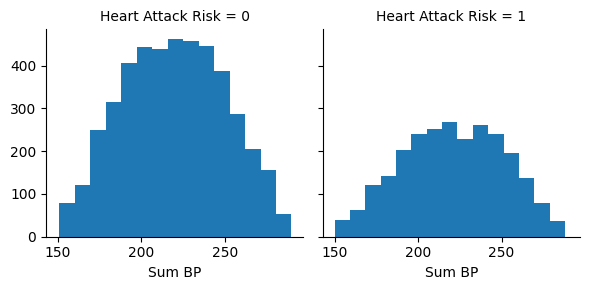

In [6]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Sum BP', bins=15)

In [7]:
def categoricalToNumeric(mapping, columnName):
        train_df[columnName] = train_df[columnName].map(mapping)
        test_df[columnName] = test_df[columnName].map(mapping)

In [8]:
#converting categorical diet, sex and continent to numeric
categoricalToNumeric({'Male':0, 'Female':1}, 'Sex')
categoricalToNumeric({'Unhealthy':0, 'Average':1, 'Healthy':2}, 'Diet')

continents = train_df['Continent'].unique()
continentsMapping = {continent:idx for idx,continent in enumerate(continents)}
categoricalToNumeric(continentsMapping, 'Continent')
train_df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Heart Attack Risk,Sum BP
0,33,0,200,48,0,1,1,1,1,7.807690,...,2,0.138443,184066,30.449815,63,6,7,0,1,219
1,56,1,262,46,1,0,1,0,0,17.297628,...,8,0.369552,211755,34.973685,333,7,8,1,1,264
2,19,1,140,54,0,1,0,0,1,8.695288,...,3,8.646334,252203,30.554246,537,2,10,2,0,270
3,50,1,163,53,0,1,1,1,1,10.161587,...,7,1.107884,121954,35.390265,591,0,9,3,1,182
4,89,1,144,92,1,0,1,0,1,16.436787,...,1,1.337570,180121,39.575483,145,2,5,3,1,263


In [9]:
#dropping unrequired continuous columns
train_df = train_df.drop(['Age','Stress Level', 'Physical Activity Days Per Week'], axis=1)
test_df = test_df.drop(['Age', 'Stress Level', 'Physical Activity Days Per Week'], axis=1)
train_df.head()

,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Continent,Heart Attack Risk,Sum BP
0,0,200,48,0,1,1,1,1,7.807690,0,0,1,0.138443,184066,30.449815,63,7,0,1,219
1,1,262,46,1,0,1,0,0,17.297628,1,1,0,0.369552,211755,34.973685,333,8,1,1,264
2,1,140,54,0,1,0,0,1,8.695288,1,1,1,8.646334,252203,30.554246,537,10,2,0,270
3,1,163,53,0,1,1,1,1,10.161587,2,0,1,1.107884,121954,35.390265,591,9,3,1,182
4,1,144,92,1,0,1,0,1,16.436787,2,1,0,1.337570,180121,39.575483,145,5,3,1,263


In [10]:
def continuousToCategorical(df,colName, minVal, maxVal, bins):
    interval = (maxVal-minVal)/(bins-1)
    # print("minVal, maxVal, bins, interval: ",minVal," ",maxVal," ",bins," ",interval)

    df.loc[ train_df[colName] <= minVal, colName] = 0
    currentMaxVal = minVal + interval
    label=1

    while currentMaxVal < maxVal:
        # print("minVal, currentMaxVal, label", minVal, " ", currentMaxVal, " ", label)
        df.loc[(df[colName] > minVal) & (df[colName] <= currentMaxVal), colName] = label
        minVal = currentMaxVal
        currentMaxVal += interval
        label += 1
    # print("currentMaxVal, label", " ", currentMaxVal, " ", label)
    df.loc[ df[colName] > (currentMaxVal-interval), colName] = label
    return df

In [11]:
# categorizing Cholesterol, exercise, sedentary, Income, BMI, Triglyceride, Sleep Hrs per day, Sum BP, heart rate
train_df = continuousToCategorical(train_df, 'Heart Rate', train_df['Heart Rate'].min(), train_df['Heart Rate'].max(), 12)
train_df = continuousToCategorical(train_df, 'Exercise Hours Per Week', train_df['Exercise Hours Per Week'].min(), train_df['Exercise Hours Per Week'].max(), 15)
train_df = continuousToCategorical(train_df, 'Sedentary Hours Per Day', train_df['Sedentary Hours Per Day'].min(), train_df['Sedentary Hours Per Day'].max(), 10)
train_df = continuousToCategorical(train_df, 'Income', train_df['Income'].min(), train_df['Income'].max(), 10)
train_df = continuousToCategorical(train_df, 'BMI', train_df['BMI'].min(), train_df['BMI'].max(), 15)
train_df = continuousToCategorical(train_df, 'Triglycerides', train_df['Triglycerides'].min(), train_df['Triglycerides'].max(), 5)
train_df = continuousToCategorical(train_df, 'Sleep Hours Per Day', train_df['Sleep Hours Per Day'].min(), train_df['Sleep Hours Per Day'].max(), 7)
train_df = continuousToCategorical(train_df, 'Sum BP', train_df['Sum BP'].min(), train_df['Sum BP'].max(), 15)
train_df = continuousToCategorical(train_df, 'Cholesterol', train_df['Cholesterol'].min(), train_df['Cholesterol'].max(), 15)

test_df = continuousToCategorical(test_df, 'Heart Rate', train_df['Heart Rate'].min(), train_df['Heart Rate'].max(), 12)
test_df = continuousToCategorical(test_df, 'Exercise Hours Per Week', train_df['Exercise Hours Per Week'].min(), train_df['Exercise Hours Per Week'].max(), 15)
test_df = continuousToCategorical(test_df, 'Sedentary Hours Per Day', train_df['Sedentary Hours Per Day'].min(), train_df['Sedentary Hours Per Day'].max(), 10)
test_df = continuousToCategorical(test_df, 'Income', train_df['Income'].min(), train_df['Income'].max(), 10)
test_df = continuousToCategorical(test_df, 'BMI', train_df['BMI'].min(), train_df['BMI'].max(), 15)
test_df = continuousToCategorical(test_df, 'Triglycerides', train_df['Triglycerides'].min(), train_df['Triglycerides'].max(), 5)
test_df = continuousToCategorical(test_df, 'Sleep Hours Per Day', train_df['Sleep Hours Per Day'].min(), train_df['Sleep Hours Per Day'].max(), 7)
test_df = continuousToCategorical(test_df, 'Sum BP', train_df['Sum BP'].min(), train_df['Sum BP'].max(), 15)
test_df = continuousToCategorical(test_df, 'Cholesterol', train_df['Cholesterol'].min(), train_df['Cholesterol'].max(), 15)

In [ ]:
train_df.head(20)

In [13]:
#dropping binary cols we don't need
train_df = train_df.drop(['Family History', 'Medication Use'],axis=1)
test_def = test_df.drop(['Family History', 'Medication Use'],axis=1)
train_df.head()

,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Continent,Heart Attack Risk,Sum BP
0,0,4,2,0,1,1,1,6.0,0,0,1.0,6,8.0,1,3,0,1,7
1,1,8,1,1,1,0,0,13.0,1,1,1.0,7,11.0,2,4,1,1,12
2,1,1,3,0,0,0,1,7.0,1,1,7.0,8,8.0,3,6,2,0,12
3,1,3,3,0,1,1,1,8.0,2,0,1.0,4,12.0,3,5,3,1,4
4,1,2,9,1,1,0,1,12.0,2,1,2.0,6,14.0,1,1,3,1,12


## Model and train

* Linear SVM, SVC and LR didn't converge
* DT and RF overfit

In [14]:
X_train = train_df.drop("Heart Attack Risk", axis=1)
Y_train = train_df["Heart Attack Risk"]
# X_test  = test_df.drop("Heart Attack Risk", axis=1).copy()
# X_train.shape, Y_train.shape, X_test.shape

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


64.28

In [17]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,Smoking,0.142416
9,Sedentary Hours Per Day,0.059980
13,Sleep Hours Per Day,0.019514
1,Heart Rate,0.010902
16,Sum BP,0.010091
7,Diet,0.008242
11,BMI,0.007453
8,Previous Heart Problems,0.003611
10,Income,-0.000501
12,Triglycerides,-0.000661


In [24]:
svc = SVC()
svc.fit(X_train, Y_train)
# Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

64.28

In [23]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
# Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


64.28

In [28]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
# Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [30]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
# Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [31]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_log, 
              acc_random_forest, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,100.00
4,Decision Tree,100.00
0,Support Vector Machines,64.28
1,Logistic Regression,64.28
3,Linear SVC,64.28
